In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('Supermarket_sales_prediction.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Item_Weight    1463
Outlet_Size    2410
dtype: int64


In [5]:
for col in df.columns:
    print(col,df[col].nunique())

Item_Identifier 1559
Item_Weight 415
Item_Fat_Content 5
Item_Visibility 7880
Item_Type 16
Item_MRP 5938
Outlet_Identifier 10
Outlet_Establishment_Year 9
Outlet_Size 3
Outlet_Location_Type 3
Outlet_Type 4
Item_Outlet_Sales 3493


In [6]:
df.describe(percentiles=[0.01,0.02,.03,.04,.05,.25,.50,.90,.95,.96,.97,.98,.99])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
1%,5.150000,0.000000,35.062752,1985.000000,83.890800
2%,5.440000,0.000000,37.219000,1985.000000,115.476352
3%,5.655000,0.000000,38.750600,1985.000000,145.583828
4%,5.820000,0.000000,40.466096,1985.000000,169.699104
5%,5.945000,0.000000,42.516700,1985.000000,188.421400
25%,8.773750,0.026989,93.826500,1987.000000,834.247400


<Axes: xlabel='Item_Fat_Content', ylabel='count'>

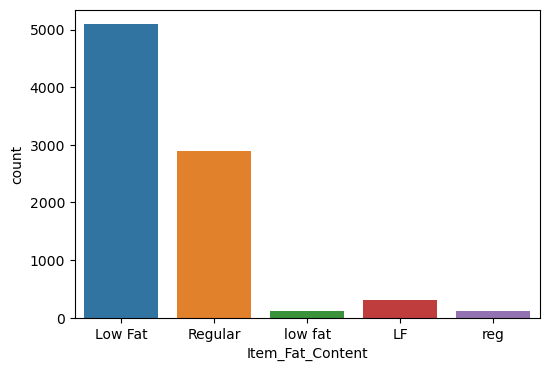

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x=df.Item_Fat_Content, data=df)

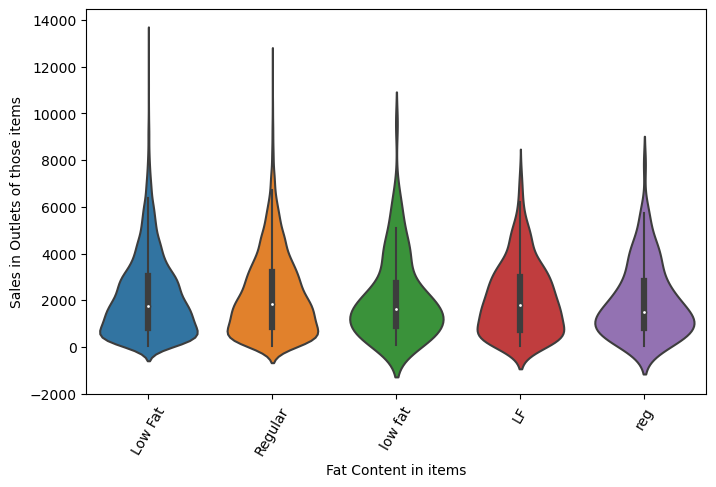

In [8]:
plt.figure(figsize=(8,5)) 
sns.violinplot(data=df,x='Item_Fat_Content',y='Item_Outlet_Sales')
plt.xlabel('Fat Content in items')
plt.ylabel('Sales in Outlets of those items')
plt.xticks(rotation=60) 
plt.show()

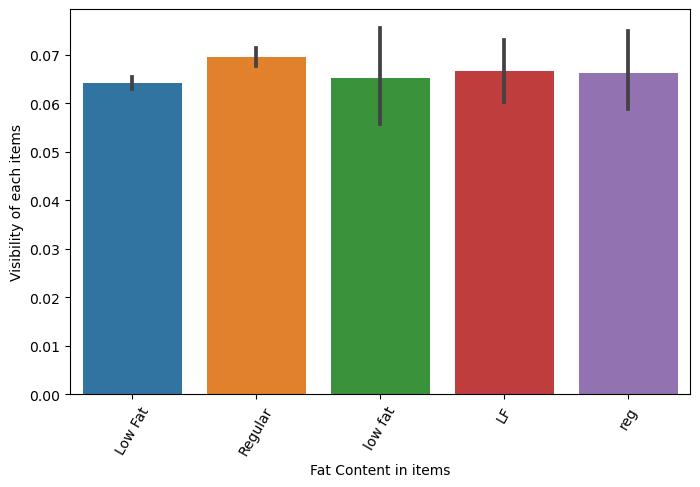

In [9]:
plt.figure(figsize=(8,5)) 
sns.barplot(data=df,x='Item_Fat_Content',y='Item_Visibility')
plt.xlabel('Fat Content in items')
plt.ylabel('Visibility of each items')
plt.xticks(rotation=60)
plt.show()

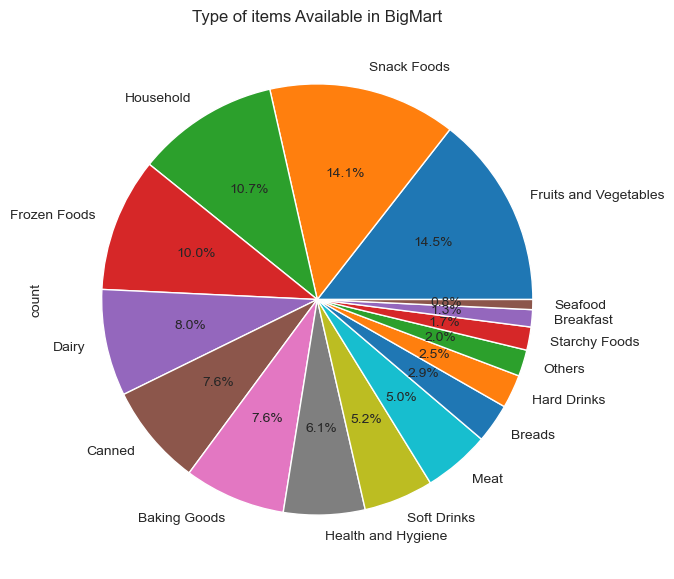

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
df['Item_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Type of items Available in BigMart')
plt.show()

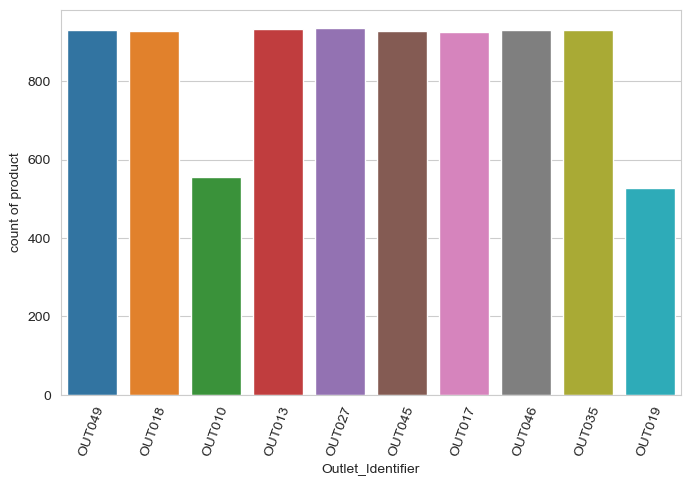

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Outlet_Identifier')
plt.xlabel('Outlet_Identifier')
plt.ylabel('count of product')
plt.xticks(rotation=70) 
plt.show()

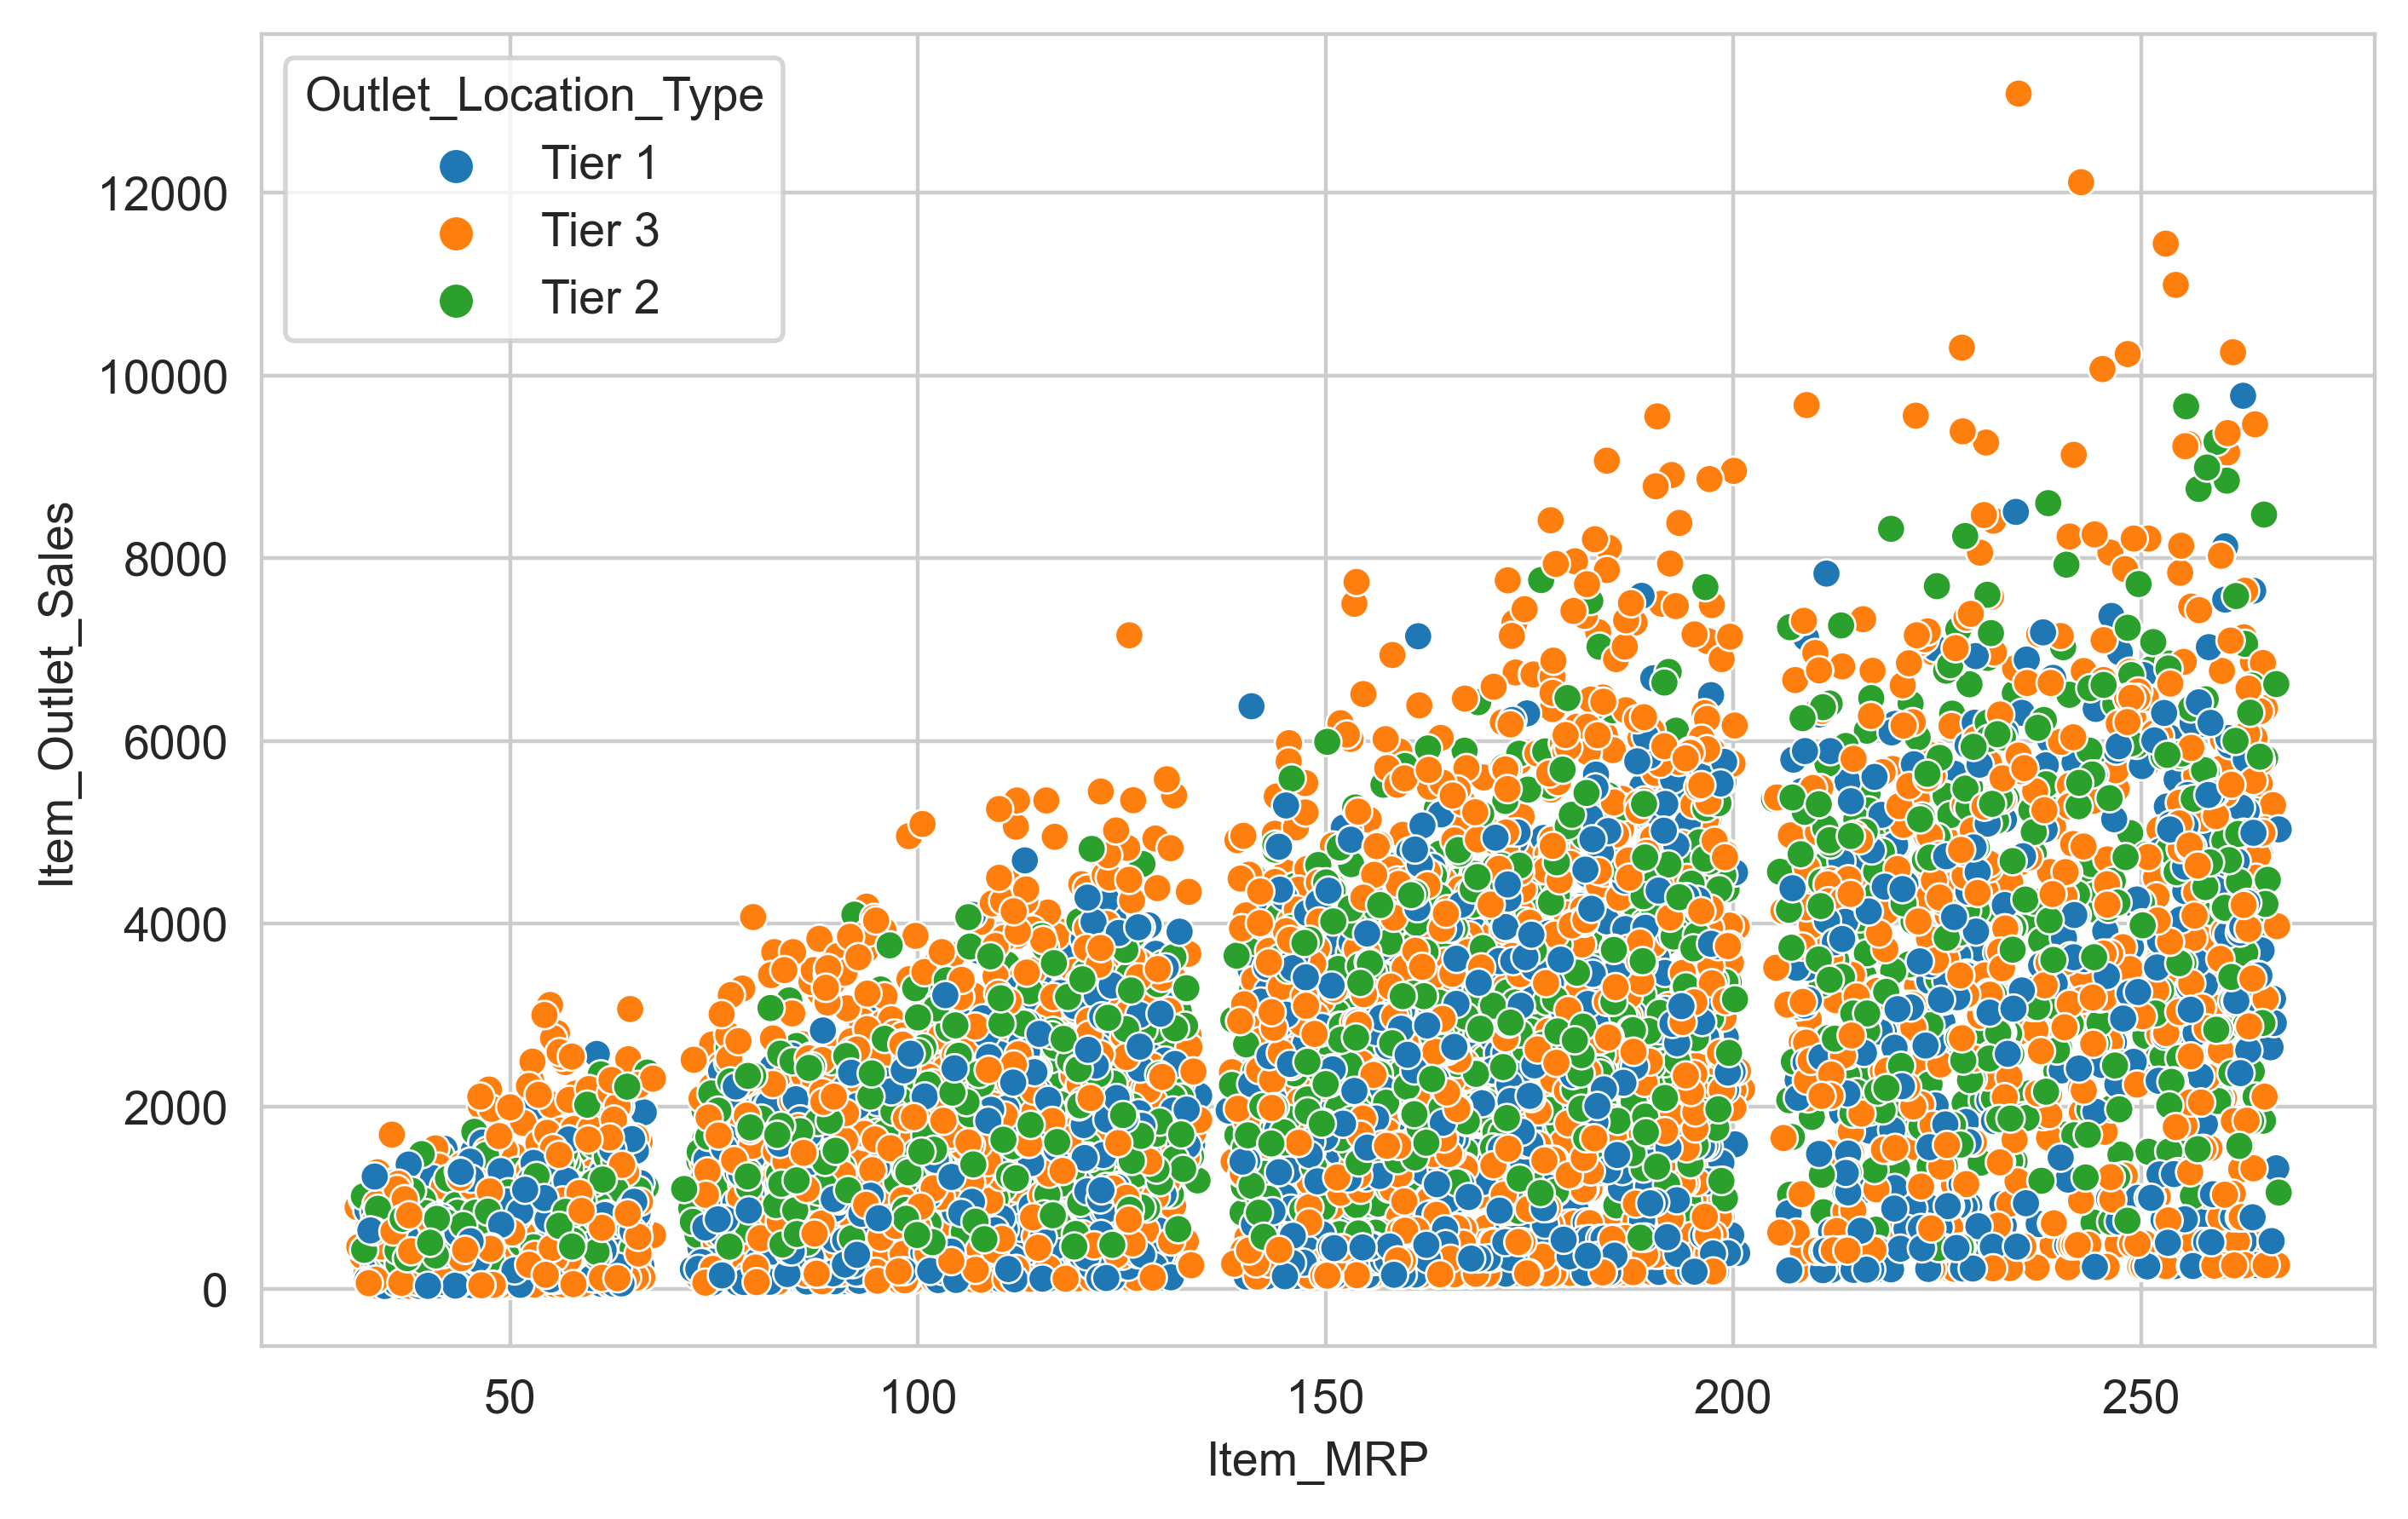

In [12]:
plt.figure(figsize=(8,5),dpi=400)
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Location_Type', data=df)
plt.show()

In [13]:
df['Outlet_Size'].value_counts(dropna=False)

Outlet_Size
Medium    2793
NaN       2410
Small     2388
High       932
Name: count, dtype: int64

In [14]:
df['Outlet_Size'].fillna(method='ffill', inplace=True)
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [15]:
df.isnull().sum().any()

False

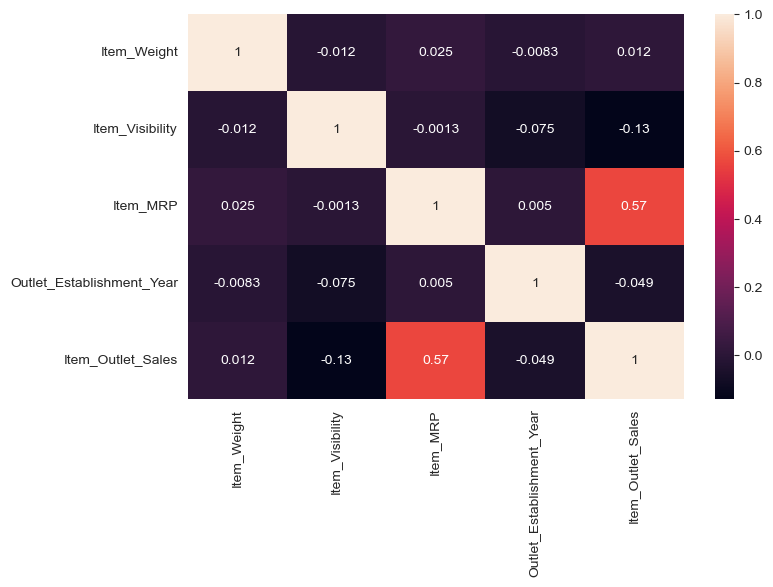

In [16]:
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)
plt.show()

In [17]:
df.drop(columns=['Item_Identifier'],inplace=True)
df.drop(columns=['Outlet_Identifier'],inplace=True)
df1 = pd.get_dummies(df)
df1.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False


In [18]:
X = df1.drop(columns='Item_Outlet_Sales')
y = df1['Item_Outlet_Sales']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)
sc = StandardScaler()
X_Scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_ScaledT = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

## RANDOM FOREST REGRESSOR¶

In [20]:
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=9, n_jobs=-1)
model.fit(X_Scaled, y_train)

RandomForestRegressor(max_depth=9, n_jobs=-1, random_state=42)

In [21]:
y_pred = model.predict(X_ScaledT)

In [22]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f"R2 Score: {round(r2*100, 2)}%")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R2 Score: 57.63%
Mean Squared Error: 1280194.2287956032
Root Mean Squared Error: 1131.4566844539843


## SUPPORT VECTOR REGRESSOR

In [23]:
svr = SVR(kernel='poly', degree=2)
svr.fit(X_Scaled, y_train)

SVR(degree=2, kernel='poly')

In [24]:
y_pred = svr.predict(X_ScaledT)

In [25]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f"R2 Score: {round(r2*100, 2)}%")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R2 Score: -3.44%
Mean Squared Error: 3125350.510248464
Root Mean Squared Error: 1767.8660894560041
